<a href="https://colab.research.google.com/github/Muhliscm/Tsf/blob/main/Task_1_score_pred_simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Prediction of score using hours spent for studying**

#Submitted by: **Muhlis cm**

###Importing libraries and data set

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#importing data set
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)
print("completed")

completed


In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


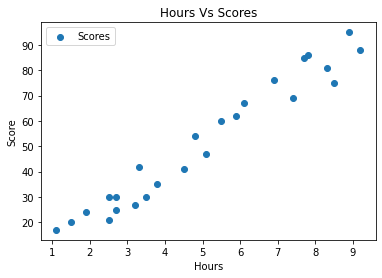

In [6]:
# checking linear relationship between dependent and independent varaibles
plt.scatter(x = 'Hours', y = 'Scores', data = df)
plt.title("Hours Vs Scores")
plt.xlabel("Hours")
plt.ylabel("Score")
plt.legend()
plt.show()

The graph shows that, there is a linear relationship between Hours and Score obtained, so we can use linear regression alogorithm

###**Data preprocessing**

In [7]:
X = df.iloc[:,:-1]
y = df.iloc[:, 1]

In [8]:
print("shape of X: ", X.shape)
print("shape of y: ", y.shape)


shape of X:  (25, 1)
shape of y:  (25,)


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [10]:
print("shape of X_train, y _train: ", X_train.shape, y_train.shape)
print("shape of X_test, y _test: ", X_test.shape, y_test.shape)



shape of X_train, y _train:  (16, 1) (16,)
shape of X_test, y _test:  (9, 1) (9,)


#Training the model


In [11]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

###**Predicting the results**

In [12]:
y_pred = reg.predict(X_test)

##**Visualizing training and test**

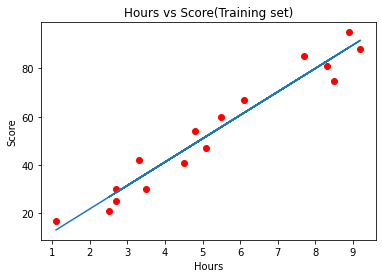

In [13]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, reg.predict(X_train))
plt.title("Hours vs Score(Training set)")
plt.xlabel("Hours")
plt.ylabel('Score')
plt.show()

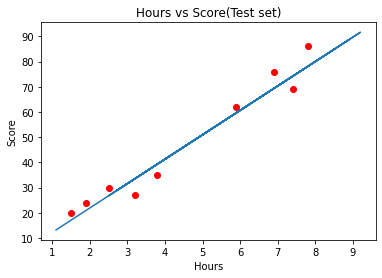

In [14]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, reg.predict(X_train))
plt.title("Hours vs Score(Test set)")
plt.xlabel("Hours")
plt.ylabel('Score')
plt.show()

In [15]:
c = {"Actual" : y_test, "predicted" :y_pred}
comp = pd.DataFrame(c)
comp

,Actual,predicted
5,20,17.042892
2,27,33.516954
19,69,74.217577
16,30,26.733516
11,62,59.681640
22,35,39.331329
17,24,20.919142
24,86,78.093827
23,76,69.372265


In [16]:
#testing own data
hour = 4
score = reg.predict([[hour]])
print("hours studied:",hour)
print("predicted Score:", score)

hours studied: 4
predicted Score: [41.26945352]


###**Evaluating the results**

In [17]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

4.691397441397446